# 2 Dimensional Histograms

Download data frame that has FDR corrected pvalues for all trans proteins. (See notebook EGFR_Fig_1C_data_munging in this folder) Next, calculate the total number of p values significant for each trans protein. Then calculate the mean and standard deviation of pvalues/ Pearson correlations across a trans gene. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import cptac

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_fdr_pvals = pd.read_csv("Pval_corr_table_Fig_1C.csv")
df_fdr_pvals = df_fdr_pvals.drop(['Unnamed: 0'], axis=1)
df_fdr_pvals = df_fdr_pvals.set_index("Comparison")
df_fdr_pvals = df_fdr_pvals[1:] #Drop EGFR 
df_fdr_pvals

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc
Comparison,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01
SOCS2_proteomics,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020297,9.557300e-01,NaN,NaN,0.472624,1.417921e-02
CDH4_proteomics,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF283_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002610,9.941900e-01
TRIM39_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002379,9.945224e-01
ADGRA3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002228,9.958381e-01


In [3]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05:
            numSig += 1
            
    return numSig

In [4]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)

In [5]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
df_fdr_pvals["Standard_Deviation_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].std(axis = 1)
df_fdr_pvals["Mean_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].mean(axis = 1)
df_fdr_pvals["Standard_Deviation_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_Hnscc","Correlation_Lscc","Correlation_Colon"]].std(axis = 1))
df_fdr_pvals["Mean_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_Hnscc","Correlation_Lscc","Correlation_Colon"]].mean(axis = 1))


In [6]:

df_fdr_pvals_1 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6,7,8])]
df_fdr_pvals_1

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,...,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,...,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,...,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,...,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,...,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,...,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GALNT5_proteomics,-0.389439,0.057159,-0.170202,0.593842,0.023757,0.933275,0.162343,2.040810e-01,0.026079,8.963231e-01,...,4.623137e-01,0.297776,0.042100,0.252618,1.086917e-01,1,0.366423,0.412223,0.227399,0.040280
NCOA4_proteomics,-0.357481,0.007938,-0.057011,0.773348,-0.086256,0.774530,0.119416,3.534835e-01,0.099871,5.338038e-01,...,9.862744e-01,NaN,NaN,0.207661,2.112708e-01,1,0.349242,0.520093,0.184929,-0.009816
RPL18_proteomics,-0.202600,0.162971,0.072834,0.688536,-0.216584,0.270229,0.279736,1.384014e-02,-0.041651,8.236951e-01,...,5.179845e-02,0.087287,0.619058,0.003343,9.906637e-01,1,0.374336,0.452599,0.186379,0.030842


In [7]:
counts = df_fdr_pvals_1['Num_sig'].value_counts()
counts

1    4149
2    1460
3     476
4     113
5      27
6       5
Name: Num_sig, dtype: int64

In [8]:
df_fdr_pvals_6 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([6])]
df_fdr_pvals_6

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,...,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,...,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,...,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,...,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,...,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,...,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063


In [9]:
df_fdr_pvals_5 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([5])]
df_fdr_pvals_5

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,...,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
ERO1A_proteomics,-0.261248,0.057296,0.348134,0.005782,0.512158,0.003795,0.509076,8.112740e-07,0.062699,0.718125,...,1.948716e-03,0.128203,0.440678,0.326440,0.021649,5,0.272192,0.156159,0.261795,0.250802
RIN3_proteomics,-0.391779,0.001713,-0.277693,0.036953,0.133122,0.543005,0.372472,7.109438e-04,-0.096905,0.548612,...,4.084006e-03,0.434309,0.011477,-0.106945,0.606829,5,0.288170,0.219173,0.319400,-0.036438
PGM1_proteomics,0.428255,0.000566,0.300791,0.020763,0.412561,0.017747,0.348497,1.677744e-03,0.152606,0.312425,...,7.468318e-01,0.334486,0.020076,0.000892,0.996914,5,0.394633,0.264625,0.187100,0.239631
PSPH_proteomics,0.293266,0.027566,0.221429,0.112045,0.092327,0.697403,0.331678,2.960361e-03,0.297952,0.022714,...,1.969723e-02,0.034009,0.877247,0.431276,0.000643,5,0.355133,0.220034,0.130431,0.250907
ALDH1L1_proteomics,0.336346,0.009176,-0.127388,0.422605,0.486761,0.005212,0.245705,3.351053e-02,0.107236,0.509567,...,4.708349e-02,0.302238,0.038785,-0.021036,0.940476,5,0.343197,0.250802,0.256733,0.132647
SDC1_proteomics,-0.378042,0.002673,0.134297,0.390785,-0.069978,0.773990,0.337332,2.454726e-03,0.315691,0.014963,...,2.751093e-03,0.020875,0.916420,0.401983,0.001928,5,0.384979,0.263245,0.272056,0.141546
IL16_proteomics,-0.426571,0.000602,-0.346052,0.006030,-0.064840,0.794734,0.042915,7.687007e-01,-0.397056,0.001341,...,5.446806e-05,0.300654,0.040116,-0.227293,0.159880,5,0.349991,0.221432,0.271991,-0.199620
PSTPIP1_proteomics,-0.314915,0.016211,-0.236628,0.084463,0.409655,0.032994,0.285805,1.169756e-02,-0.316972,0.014645,...,8.085505e-04,0.168948,0.550054,-0.076048,0.734400,5,0.290231,0.180659,0.310636,-0.060897
TRIM26_proteomics,-0.266500,0.050973,-0.344002,0.006441,0.143842,0.504773,0.268657,1.871413e-02,0.286645,0.029224,...,1.090177e-03,-0.363299,0.011252,-0.088108,0.685648,5,0.271236,0.163514,0.290457,-0.095169


In [10]:
pd.set_option('display.max_columns', None)
df_fdr_pvals_6 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([6])]
df_fdr_pvals_6

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,0.796728,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,0.514002,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,0.284408,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,-0.440949,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,0.370603,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063


In [11]:
def HasPosNeg(row):
    hasPos = False
    hasNeg= False

    for item in row:
        if pd.isnull(item):
            continue
        if item < -0.2:
            hasNeg = True
        if item > 0.2:
            hasPos = True
            
    if hasPos & hasNeg:
        return True
    return False

In [12]:
col = ["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_Hnscc","Correlation_Lscc","Correlation_Colon"]
df_fdr_pvals_6 = df_fdr_pvals_6[col]
#df_fdr_pvals_6["Pos_Neg"] = df_fdr_pvals_6.apply(HasPosNeg, axis = 1)
df_fdr_pvals_6


,Correlation_Gbm,Correlation_kidney,Correlation_Ovar,Correlation_Brca,Correlation_Luad,Correlation_Hnscc,Correlation_Lscc,Correlation_Colon
Comparison,,,,,,,,
LANCL2_proteomics,0.478723,0.188217,0.110983,0.300981,0.588808,0.796728,0.575817,0.320786
CD109_proteomics,-0.361839,0.268902,0.015377,0.265349,0.113339,0.514002,0.360461,0.297635
CNNM4_proteomics,-0.372324,0.069926,0.076606,-0.260055,0.270616,0.284408,0.311652,0.352937
KIF13B_proteomics,-0.143903,-0.310972,0.439778,-0.312353,-0.272975,-0.440949,-0.363670,0.019902
MYO10_proteomics,0.447478,-0.263921,0.374118,0.515801,0.230896,0.370603,0.292466,NaN


# Step 2: Plot 2D Histogram

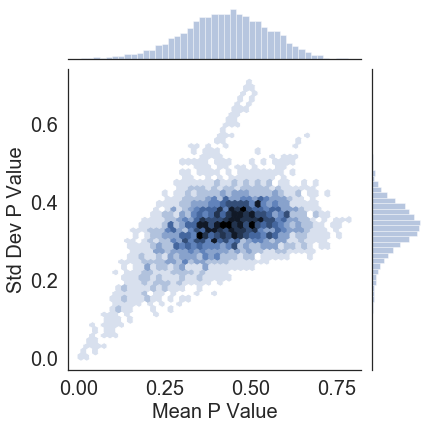

In [13]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_sig_atleast1_cancer.png", dpi = 300)

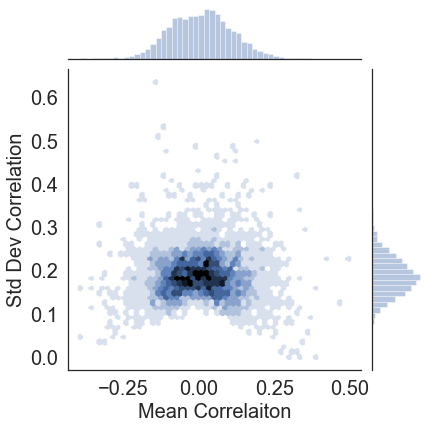

In [14]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_atleast1_cancer.png", dpi = 300)
plt.show()

# Filter for genes significant in at least 2 Cancers 

In [15]:

df_fdr_pvals_2 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([2,3,4,5,6,7,8])]

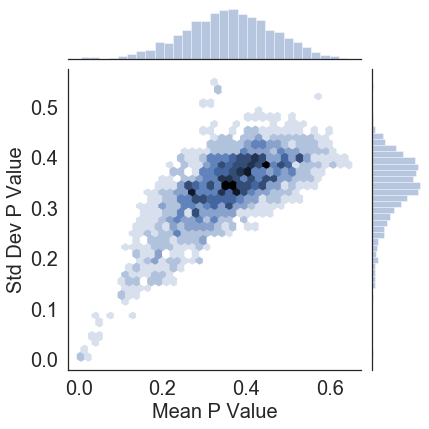

In [16]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_2, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_atleast2_cancers.png", dpi = 300)

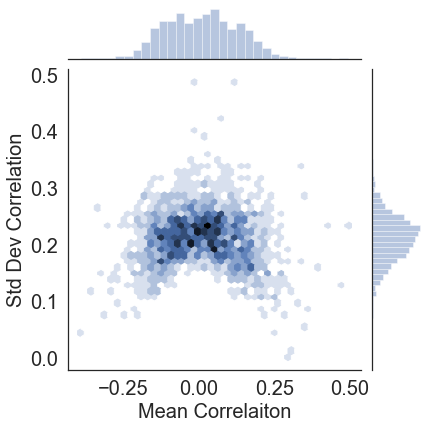

In [17]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_2, kind="hex", bins = 10)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_atleast2_cancers.png", dpi = 300)
plt.show()

# At least 3 Cancers

In [18]:

df_fdr_pvals_3 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([3,4,5,6,7,8])]

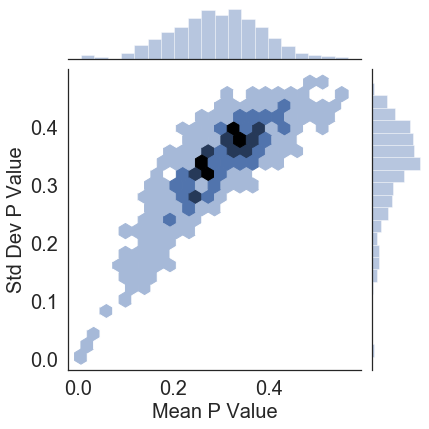

In [19]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_3, kind="hex", bins = 5)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_EGFR_atleast3_cancers.png", dpi = 300)

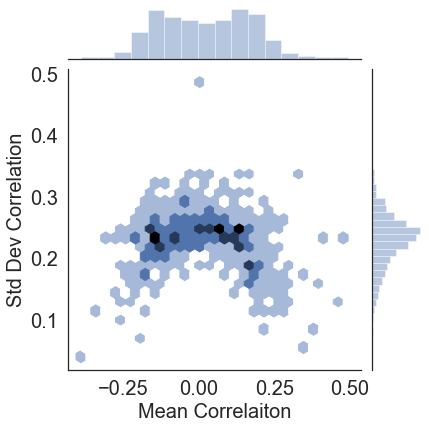

In [20]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_3, kind="hex", bins = 5)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_EGFR_atleast3_cancers.png", dpi = 300)
plt.show()

# Single Gene Example PLAU

In [21]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)

In [22]:

df_fdr_pvals_1 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6,7,8])]
df_fdr_pvals_1

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,0.796728,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,0.284408,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,-0.440949,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,0.370603,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,0.514002,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C15orf52_proteomics,NaN,NaN,NaN,NaN,0.149572,0.577432,0.272793,1.668712e-02,NaN,NaN,NaN,NaN,0.261515,0.076422,NaN,NaN,1,0.307954,0.223514,0.068120,0.227960
STAG3_proteomics,NaN,NaN,NaN,NaN,-0.123167,0.592469,0.330538,8.207397e-03,-0.211200,2.304907e-01,NaN,NaN,NaN,NaN,-0.025327,9.412779e-01,1,0.410214,0.443111,0.237669,-0.007289
TCAF2_proteomics_1,NaN,NaN,NaN,NaN,0.135837,0.602339,0.333667,2.773893e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.423957,0.302557,0.139887,0.234752


In manuscript, a single gene (PLAU) from the histogram figure is mentioned. Here are the correlations and pvalues as well as the average and std dev for the p values and correlations.

In [23]:
rowData = df_fdr_pvals_1.loc[ 'F3_proteomics' , : ]
rowData

Correlation_Gbm                   0.321497
P_value_Gbm                       0.013380
Correlation_kidney                0.001084
P_value_kidney                    0.997191
Correlation_Ovar                       NaN
P_value_Ovar                           NaN
Correlation_Brca                 -0.007981
P_value_Brca                      0.968144
Correlation_Luad                 -0.032167
P_value_Luad                      0.869082
Correlation_Hnscc                 0.055360
P_value_Hnscc                     0.775586
Correlation_Colon                 0.400421
P_value_Colon                     0.023047
Correlation_Lscc                  0.149498
P_value_Lscc                      0.421607
Num_sig                           2.000000
Standard_Deviation_P_value        0.428731
Mean_P_value                      0.581148
Standard_Deviation_Correlation    0.172064
Mean_Correlation                  0.126816
Name: F3_proteomics, dtype: float64